<a href="https://colab.research.google.com/github/gonzalezzayra/EDP-II/blob/main/Crank_Nicolson_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Método de Crank-Nicolson**

----

El problema a resolver es

$$\frac{\partial u }{\partial t}(x,t) = \frac{\partial^2 u }{\partial x^2}(x,t) $$

$$0 < x < 1, \quad  0 < t$$

sujeta a las restricciones:

$$u(0,t) = u(1,t) = 0, \quad 0 <t $$

$$u(x,0) = f(x) = 1 -4(x - \frac{1}{2})^2$$

con

$$h = \frac{1}{10} =  0.1$$

In [126]:
#Importar librerias para los calculos
import sympy as sp
import numpy as np

#Importar librerias para graficar
import matplotlib.pyplot as plt #Gráficas 2D
from mpl_toolkits.mplot3d import Axes3D  #Gráficas 3D
from matplotlib import cm  #Mapa de color

#Importar libreria para la tabla
from tabulate import tabulate #Tabla

sympy, para matematicas simbólicas, en el código se utiliza para las matrices, como en:

```
sp.Matrix([])
```

```
A.LUsolve(b)
```
numpy, para matematicas numéricas, en el código se utiliza para:


```
np.pi
```

```
np.linspace()
```

Condición inicial:

$$u(x,0) = f(x) = 1 -4(x - \frac{1}{2})^2$$


In [127]:
#Defininr la condición inicial
def f(x):
    return 1-4*(x-0.5)**2

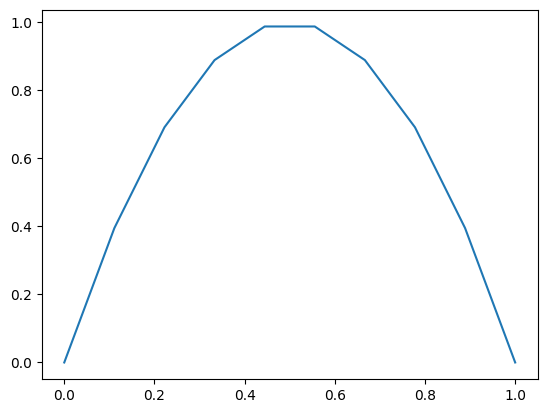

In [128]:
#Gráfica de la condición inicial
x = np.linspace(0,1,10)
plt.plot(x,f(x))

Definir matriz A, en este caso la matriz es  **tridiagonal**

Al sustituir en la fórmula:

$$- r  \cdot u_{i-1, j+1} + (2 + 2r) u_{i,j+1}  - r  \cdot u_{i+1,j+1} = r\cdot u_{i-1,j} + (2-2r) u_{i,j} +r\cdot u_{i+1,j}$$

En su forma matricial:

\begin{equation}
\overbrace{
    \begin{pmatrix}
    2+2r & -r & 0 & \cdots & 0 \\
    -r & 2+2r & -r & \cdots & 0 \\
    0 & -r & 2+2r & \cdots & 0 \\
    \vdots & \vdots & \ddots & \ddots & \vdots \\
    0 & 0 & 0 & -r & 2+2r
    \end{pmatrix}
    \begin{pmatrix}
    u_{1,j} \\
    u_{2,j} \\
    u_{3,j} \\
    \vdots \\
    u_{m-1,j}
    \end{pmatrix}
}^{\text{desconocido}}
=
\underbrace{
    \begin{pmatrix}
    2-2r & r & 0 & \cdots & 0 \\
    r & 2-2r & r & \cdots & 0 \\
    0 & r & 2-2r & \cdots & 0 \\
    \vdots & \vdots & \ddots & \ddots & \vdots \\
    0 & 0 & 0 & r & 2-2r
    \end{pmatrix}
    \begin{pmatrix}
    u_{1,j-1} \\
    u_{2,j-1} \\
    u_{3,j-1} \\
    \vdots \\
    u_{m-1,j-1}
    \end{pmatrix}
}_{\text{conocido }}
\end{equation}

con $r$:

$$r = \frac{\alpha^2 k}{h^2} $$

los valores de $h = 0.1$, $k = 0.01$ y $\alpha^2 = 1$

$$r = \frac{(1) \cdot (0.1)}{(0.01)^2} = 1 ⇒ \boxed{ r = 1}$$

Esto es para formar la matriz tridiagonal, pero son diferentes las condiciones para la matriz A y b.

In [129]:
#Para una formar la matriz tridiagonal
def tridiagonal(n,a,b):
  return sp.Matrix([
      [a if i ==j else b if abs(i-j) == 1 else 0 for j in range(n)]
      for i in range(n)
  ])

In [130]:
#Para definir el valor de r
r = 1

Esta es la parte de la matriz $A$

\begin{equation}
\overbrace{
    \begin{pmatrix}
    2+2r & -r & 0 & \cdots & 0 \\
    -r & 2+2r & -r & \cdots & 0 \\
    0 & -r & 2+2r & \cdots & 0 \\
    \vdots & \vdots & \ddots & \ddots & \vdots \\
    0 & 0 & 0 & -r & 2+2r
    \end{pmatrix}
    \begin{pmatrix}
    u_{1,j} \\
    u_{2,j} \\
    u_{3,j} \\
    \vdots \\
    u_{m-1,j}
    \end{pmatrix}
}^{\text{Matriz A}}
\end{equation}

In [131]:
#Para formar la matriz A
A = tridiagonal(9,2 +2*r, -r)

In [132]:
A

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

Esta es la parte para la matriz $B$

\begin{equation}
\underbrace{
    \begin{pmatrix}
    2-2r & r & 0 & \cdots & 0 \\
    r & 2-2r & r & \cdots & 0 \\
    0 & r & 2-2r & \cdots & 0 \\
    \vdots & \vdots & \ddots & \ddots & \vdots \\
    0 & 0 & 0 & r & 2-2r
    \end{pmatrix}
    \begin{pmatrix}
    u_{1,j-1} \\
    u_{2,j-1} \\
    u_{3,j-1} \\
    \vdots \\
    u_{m-1,j-1}
    \end{pmatrix}
}_{\text{Matriz B}}
\end{equation}

In [133]:
#Para la matriz B
B = tridiagonal(9, 2-2*r, r)

In [134]:
B

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

Como elegimos $r = 1$, la diagonal se anula

In [135]:
b = sp.Matrix([f(0.1*(i+1)) for i in range(9)])

Esta es la primera entrada de la tabla, para $t=0$ y $x=0$

In [136]:
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

In [137]:
def crank_nicolson(A, B, b, j):
  b_1 = B*b #paso inicial
  S = [] #aquí se guarda cada solución

  for i in range(j):
    sol = A.LUsolve(b_1) #u^{n+1}, método de Thomas
    S.append(sol.T) #se guarda la fila
    b_1 = B*sol #para el siguiente paso

  #Convertir lista de vectores sympy a una matriz sympy
  return sp.Matrix(S)

In [138]:
j = 50 #50 pasos

In [139]:
U = crank_nicolson(A, B, b, j)

**Ejercicio 1**

In [140]:
#Para realizar la tabla que va de t = 0.01 a 0.1
data = [list(U.row(i)) for i in range(10)]

print(tabulate(data, tablefmt = "grid"))

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.23989  | 0.454784 | 0.623126 | 0.729952 | 0.766473 | 0.729952 | 0.623126 | 0.454784 | 0.23989  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.21645  | 0.411015 | 0.564592 | 0.662619 | 0.696285 | 0.662619 | 0.564592 | 0.411015 | 0.21645  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195788 | 0.372138 | 0.511722 | 0.601117 | 0.631868 | 0.601117 | 0.511722 | 0.372138 | 0

**Ejercicio 2**

La solución exacta de la ecuación es:

$$u(x,t) = \sum_{n=0}^{∞} \frac{32}{((2n +1)\pi)^3} \sin ((2n + 1) \pi x)e^{-(2n+1)^2 \pi^2 t}$$

In [141]:
#Definir la solución exacta
def sol_exacta(x, t):
    suma = 0
    for n in range(1, 100, 2): #Se calcula solo impares
        bn = 32 / ((np.pi * n)**3)
        suma += bn * np.sin(n * np.pi * x) * np.exp(-(n * np.pi)**2 * t)
    return suma

In [142]:
#Para extraer los valores de t = 0.10 y convertirlo a lista
datos_u = list(np.array(U.row(9)).astype(float).flatten())
#Para agregar los ceros del principio y final, de los datos que calculamos
yd = [0] + datos_u + [0]

In [143]:
#Para t = 0.1
ytabla = [0, 0.1189, 0.2261, 0.3112, 0.3658, 0.3847, 0.3658, 0.3112, 0.2261, 0.1189, 0]

#imprimir las listas de los datos
print("Los valores obtenidos:")
print(np.round(yd, 6))
print("Los valores de la tabla 2.7:")
print(ytabla)

Los valores obtenidos:
[0.       0.119736 0.227748 0.313462 0.368491 0.387452 0.368491 0.313462
 0.227748 0.119736 0.      ]
Los valores de la tabla 2.7:
[0, 0.1189, 0.2261, 0.3112, 0.3658, 0.3847, 0.3658, 0.3112, 0.2261, 0.1189, 0]


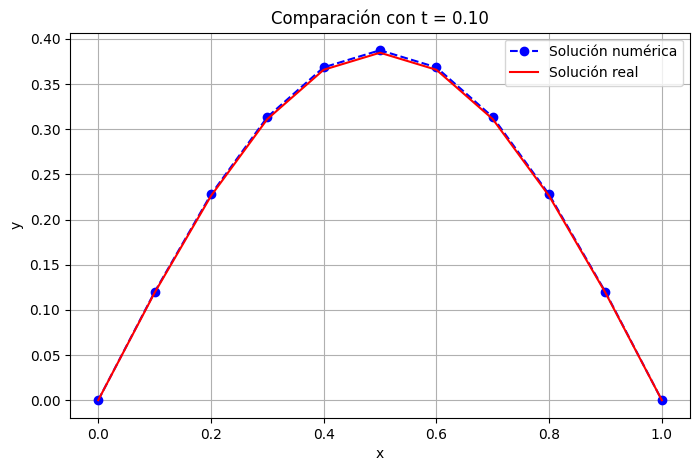


Error absoulto: [0.         0.00083601 0.00164791 0.00226218 0.00269123 0.00275235
 0.00269123 0.00226218 0.00164791 0.00083601 0.        ]


In [144]:
#Grafica para comparar los datos de t = 0.1
x= np.linspace(0, 1, 11)

plt.figure(figsize=(8, 5))
plt.plot(x, yd, 'bo--', label='Solución numérica')
plt.plot(x, ytabla, '-',color = "red",  label='Solución real ')
plt.title('Comparación con t = 0.10')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#Er
error = np.abs(np.array(yd) - np.array(ytabla))
print("\nError absoulto:", error)

Se puede ver que los errores no son muy grandes, aparte que nos damos cuenta que después del error de $0.00275235$ se vuelven a repetir los valores de los errores, ya que es simetrico, es normal.

En cuanto al método de Crank Nicolson, podemos decir que tiene una buena aproximación y estabilidad.

In [145]:
U_np = np.array(U.tolist(), dtype = float)

In [146]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.5, j) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

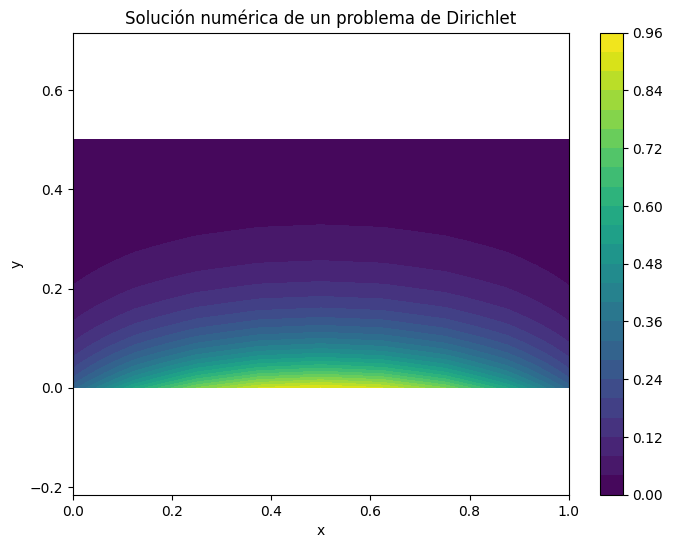

In [147]:
#Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

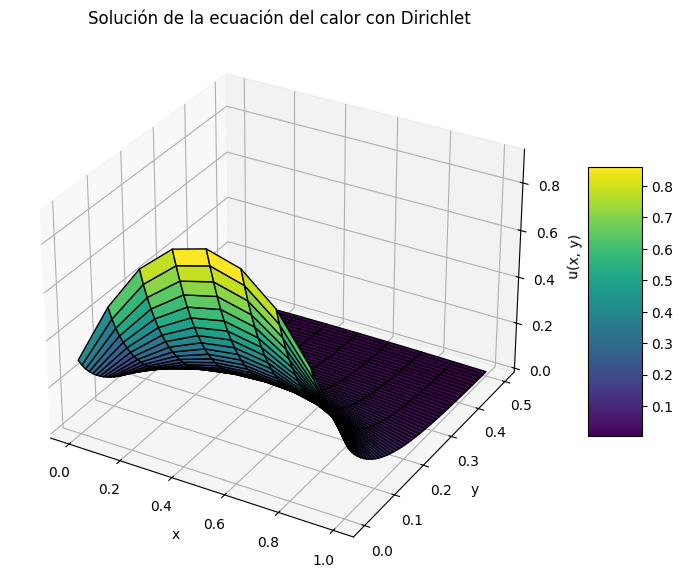

In [148]:
#Para la gráfica 3D
#%matplotlib notebook, quitar para que sirva en Colab
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()